| Nama               | NIM        | Kelas   |
| -------------------- | ------------ | --------- |
| Dedy Bayu Setiawan | 2341720041 | TI - 3H |


# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
#!pip install -q ucimlrepo

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [2]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [3]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Data Size
df.shape

(48842, 15)

In [5]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [6]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

**Jawaban:**  Terdapat tiga variabel yang memilki nilai yang hilang yaitu 
- workclass dengan 963 data yang hilang
- occupantion dengan 966 data yang hilang
- native-country dengan 274 data yang hilang 

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [7]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df.loc[:, 'workclass'] = df['workclass'].fillna(df['workclass'].mode()[0]) # isi NaN dengan mode workclass
df.loc[:, 'occupation'] = df['occupation'].fillna(df['occupation'].mode()[0]) # isi NaN dengan mode occupation
df.loc[:, 'native-country'] = df['native-country'].fillna(df['native-country'].mode()[0]) # isi NaN dengan mode native-country

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# cari kolom kualitatif
categorical_cols = df.select_dtypes(include=['object']).columns

# nilai unik tiap kolom
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts().head(10))  # tampilkan 10 teratas

# membersihkan jadi 'Others'
for col in categorical_cols:
    df[col] = df[col].str.strip()           # hapus spasi di awal/akhir
    df[col] = df[col].replace('?', 'Others')



Kolom: workclass
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Others               1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Kolom: education
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
Name: count, dtype: int64

Kolom: marital-status
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

Kolom: occupation
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                55

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

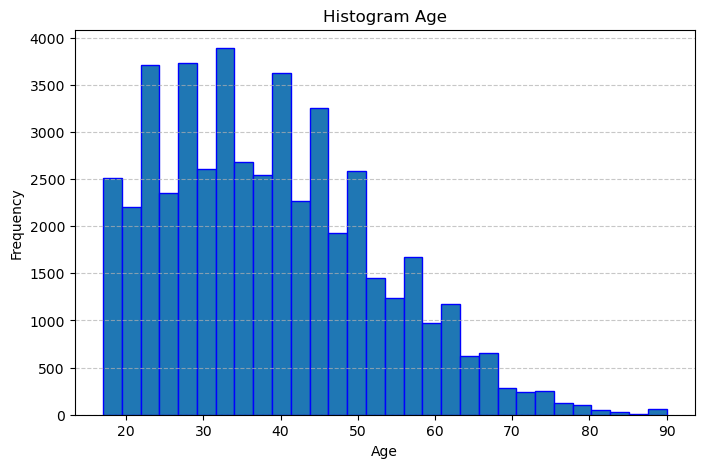

In [36]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=30, edgecolor='blue')
plt.title('Histogram Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

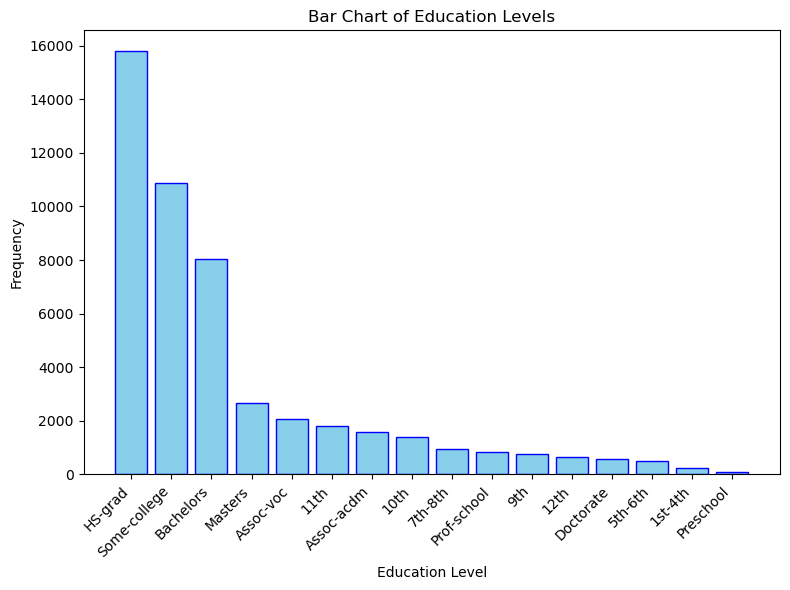

In [31]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(8,6))
plt.bar(df['education'].value_counts().index, df['education'].value_counts().values, color='skyblue', edgecolor='blue')
plt.title('Bar Chart of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

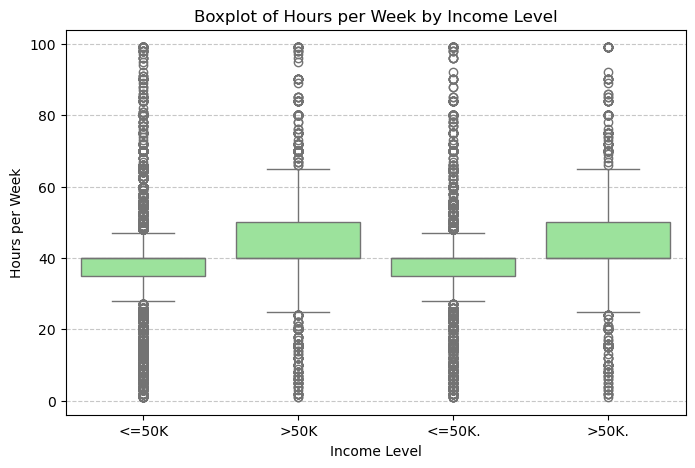

Jumlah outlier per kategori income:
income
<=50K     7174
<=50K.    3601
>50K      1834
>50K.      887
Name: outlier, dtype: int64

Kategori dengan outlier terbanyak: <=50K


In [ ]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='income', y='hours-per-week', data=df, color='lightgreen')

plt.title('Boxplot of Hours per Week by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Hours per Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['outlier'] = ((df['hours-per-week'] < lower_bound) | 
                 (df['hours-per-week'] > upper_bound))

outlier_count = df.groupby('income')['outlier'].sum()

print("Jumlah outlier per kategori income:")
print(outlier_count)
print("\nKategori dengan outlier terbanyak:", outlier_count.idxmax())

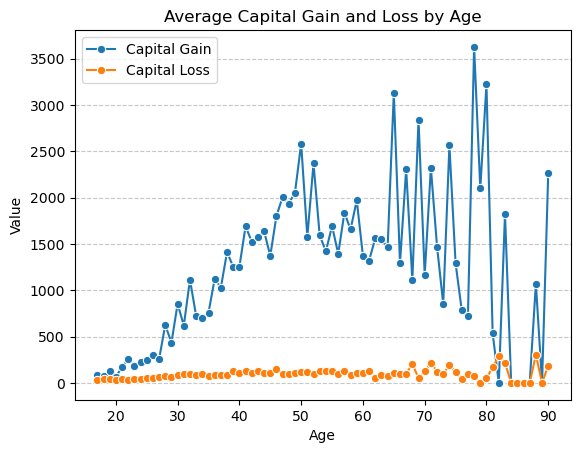

In [ ]:
# Jawab 1.4 - Lineplot

#grup education-num dan htung rata-rata age
education_age = df.groupby("age")[["capital-gain", "capital-loss"]].mean().reset_index()

sns.lineplot(data=education_age, x="age", y="capital-gain", label="Capital Gain", marker='o')
sns.lineplot(data=education_age, x="age", y="capital-loss", label="Capital Loss", marker='o')

plt.title('Average Capital Gain and Loss by Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
  1. distribusi cenderung right skewed (menjorok ke kanan) atau mayoritas usia di bawah 20 - 50 tahun, 
      jadi distribusinya tidak normal tetapi cenderung skewed kekanan dengan mayoritas di sekitar 20-50 tahun atau usia produktif.
  2. jika terdapat data yang hilang pada age, dikarenakan variabel age adalah numerik continue,
      maka bisa diatasi dengan mengisi nilai atau imputasi menggunakan mean, median, modus 
  3. Berdasarkan perhitungan yang dilakukan dibawah boxplot, 
    Jumlah outlier per kategori income:
    income
    <=50K     7174
    <=50K.    3601
    >50K      1834
    >50K.      887
    Kategori dengan outlier terbanyak: <=50K dengan jumlah 7174 outlier.
'''

'\n  1. distribusi cenderung right skewed (menjorok ke kanan) atau mayoritas usia di bawah 20 - 50 tahun, \n      jadi distribusinya tidak normal tetapi cenderung skewed kekanan dengan mayoritas di sekitar 20-50 tahun atau usia produktif.\n  2. jika terdapat data yang hilang pada age, dikarenakan variabel age adalah numerik continue,\n      maka bisa diatasi dengan mengisi nilai atau imputasi menggunakan mean, median, modus \n  3. Berdasarkan perhitungan yang dilakukan dibawah boxplot, \n    Jumlah outlier per kategori income:\n    income\n    <=50K     7174\n    <=50K.    3601\n    >50K      1834\n    >50K.      887\n    Kategori dengan outlier terbanyak: <=50K dengan jumlah 7174 outlier.\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [47]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.loc[:, 'sex'] = le.fit_transform(df['sex'])
df.loc[:, 'income'] = le.fit_transform(df['income'])


In [48]:
df.head()   

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,outlier
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0,False


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [53]:
print(df['income'].dtype)


object


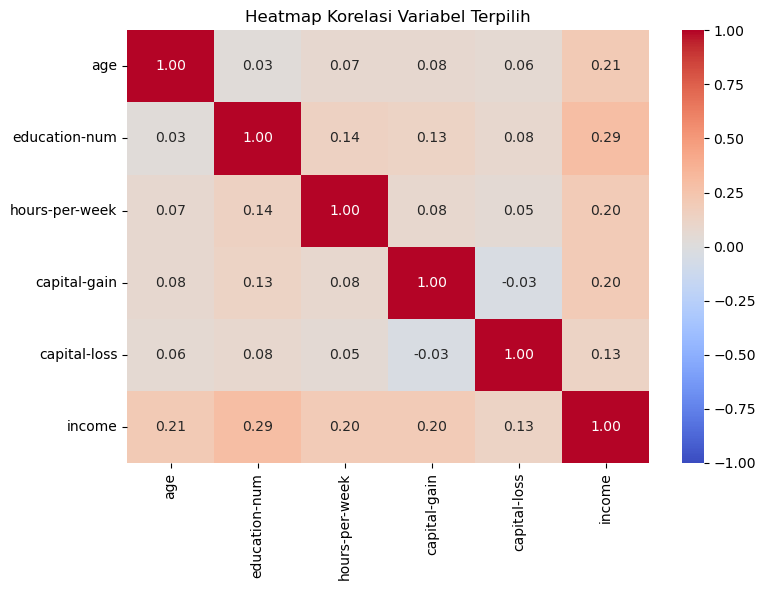

In [54]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import seaborn as sns
df['income'] = df['income'].astype(int)

cols = ['age', 'education-num', 'hours-per-week', 
        'capital-gain', 'capital-loss', 'income']

df_subset = df[cols]

corr = df_subset.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Heatmap Korelasi Variabel Terpilih')
plt.tight_layout()
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
1. income memiliki korelasi positif paling tinggi dengan education-num (0.29), j
    adi semakin tinggi education-num maka income cenderung lebih 
2. capital-gain memiliki korelasi negatif dengan capital-loss (-0.03),
    jadi semakin tinggi capital-gain maka capital-loss semakin rendah

'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [55]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


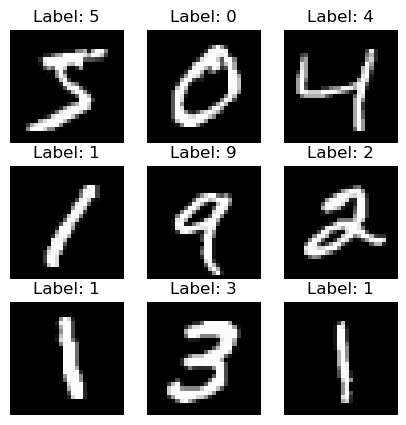

In [56]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
import cv2

# buat array kosong
X_train_up = np.zeros((X_train.shape[0], 32, 32), dtype=np.uint8)
X_test_up  = np.zeros((X_test.shape[0], 32, 32), dtype=np.uint8)

# upsampling 32x32
for i in range(X_train.shape[0]):
    X_train_up[i] = cv2.resize(X_train[i], (32, 32), interpolation=cv2.INTER_CUBIC)

for i in range(X_test.shape[0]):
    X_test_up[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Train shape (upsampled):", X_train_up.shape)
print("Test shape (upsampled):", X_test_up.shape)


Train shape (upsampled): (60000, 32, 32)
Test shape (upsampled): (10000, 32, 32)


5 data hasil proses upsampling


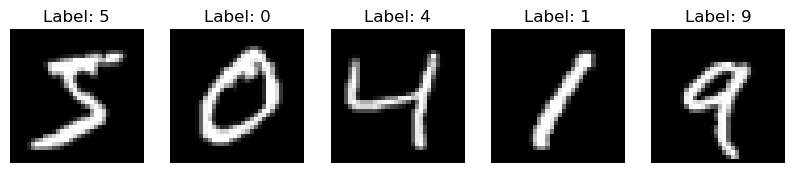

In [62]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_up[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
print("5 data hasil proses upsampling")
plt.show()


## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Train shape: (60000, 32, 32)
Test shape: (10000, 32, 32)
Range nilai train: 0.0 - 0.00392156862745098


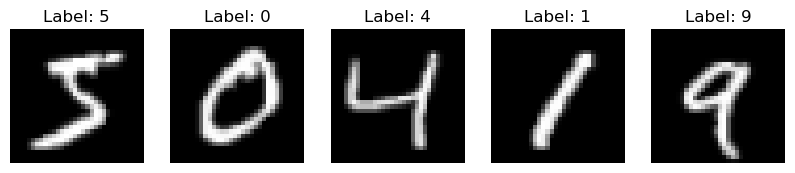

In [63]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from skimage.transform import resize


# upsampling ke 32x32
X_train_up = np.array([resize(img, (32, 32), anti_aliasing=True) for img in X_train])
X_test_up  = np.array([resize(img, (32, 32), anti_aliasing=True) for img in X_test])

# normalisasi rentang 0-1
X_train_norm = X_train_up / 255.0
X_test_norm  = X_test_up / 255.0

print("Train shape:", X_train_norm.shape)
print("Test shape:", X_test_norm.shape)
print("Range nilai train:", X_train_norm.min(), "-", X_train_norm.max())

# 5 data hasil normalisasi
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_norm[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [ ]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_flat = np.zeros((X_test_norm.shape[0], 32*32))

X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

print("Shape sebelum flatten:", X_test_norm.shape)
print("Shape sesudah flatten:", X_test_flat.shape)

Shape sebelum flatten: (10000, 32, 32)
Shape sesudah flatten: (10000, 1024)
